# <center> Build various MLP architectures for MNIST dataset. </center>
___

###  <b>Exercise</b> :
1.	Use MNIST dataset, which is present in keras datasets.
2.	Try 2-hidden layer, 3-hidden layer and 5-hidden layer MLP.
3.	Also use dropout and batch normalization and plot train-test error vs epochs for each model.
4.	Write your observations in English as crisply and unambiguously as possible. Always quantify your results.


### Information regarding data set :

1. <b>Title</b>: MNIST database of handwritten digits 

2. <b>Sources</b>: Modified National Institute of Standards and Technology(MNIST)

3. <b>Relevant Information</b>: The MNIST database of handwritten digits, available from the page(http://yann.lecun.com/exdb/mnist/), has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image..

In [119]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# For plotting purposes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.initializers import he_normal
from keras.layers import BatchNormalization, Dense, Dropout

# Import MNIST Dataset
from keras.datasets import mnist

In [120]:
# Load and split MNIST dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [121]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of testing examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

x_train shape:  (60000, 28, 28)
x_test shape:  (10000, 28, 28)
Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


<br/>

##### If we observe the input shape its 3 dimensional vector, so for each image we have a (28*28) vector.
##### We will convert the (28*28) vector into single dimensional vector of 1 * 784 

In [122]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 

# after converting the input images from 3d to 2d vectors
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d)"%(x_train.shape[1]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d)"%(x_test.shape[1]))

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)
Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [123]:
# An example data point
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [124]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X_std => (X - Xmin)/(Xmax-Xmin)
# X_scaled = X_std * (Xmax - Xmin) + Xmin
minMaxScaler = MinMaxScaler()

x_train = minMaxScaler.fit_transform(x_train)
x_test = minMaxScaler.transform(x_test)

# x_train data point after normlizing.
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [125]:
temp = y_train[0]
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

print("After converting the output {0} into a vector : {1}".format(temp,y_train[0]))

After converting the output 5 into a vector : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<br/>
<br/>

In [166]:
# Plot train and cross validation loss
def plot_train_cv_loss(trained_model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = trained_model.history['val_loss']
    train_loss = trained_model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
    
# Plot weight distribution using violin plot
def plot_weights(model):
    w_after = model.get_weights()

    o1_w = w_after[0].flatten().reshape(-1,1)
    o2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)


    fig = plt.figure(figsize=(10,7))
    plt.title("Weight matrices after model trained\n")
    plt.subplot(1, 3, 1)
    plt.title("Trained model\n Weights")
    ax = sns.violinplot(y=o1_w,color='b')
    plt.xlabel('Hidden Layer 1')

    plt.subplot(1, 3, 2)
    plt.title("Trained model\n Weights")
    ax = sns.violinplot(y=o2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')

    plt.subplot(1, 3, 3)
    plt.title("Trained model\n Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

#### With 2-Hidden Layers

In [128]:
# Batch size 
batch_size = 128 

# Number of time whole data is trained
epochs = 20

# Input layer dimension 
input_dimension = x_train.shape[1]

# Output layer dimension 
output_dimension = y_train.shape[1]

In [129]:
# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : dense Layer
dense_layer1 = Dense(512,
                       activation="relu",
                       input_shape=(input_dimension,),
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer1)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 2nd hidden layer : dense Layer
dense_layer2 = Dense(128,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer2)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add output layer : dense Layer
dense_layer3 = Dense(output_dimension, activation='softmax')
model.add(dense_layer3)

# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290

In [150]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))

Test score: 0.052687030650049566
Test accuracy: 98.35%


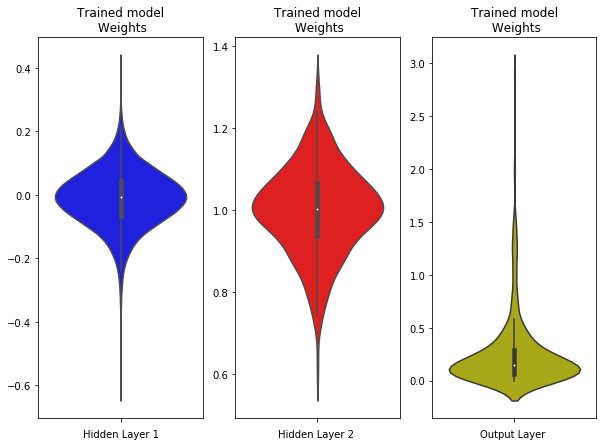

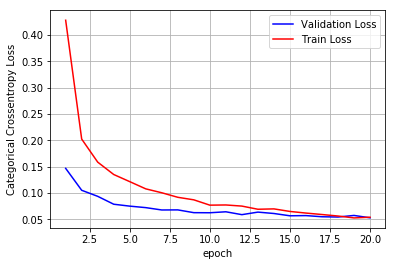

In [167]:
print()
print()
# Plot weight distribution using violin plot
plot_weights(model)

print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

<br/>

#### On 16th epoch we find that validation error and train error comes together, so best value for epoch is 16-18

</br>
</br>

#### With 3-Hidden Layers

In [168]:
# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : dense Layer
dense_layer1 = Dense(512,
                       activation="relu",
                       input_shape=(input_dimension,),
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer1)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 2nd hidden layer : dense Layer
dense_layer2 = Dense(256,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer2)

# Add 3rd hidden layer : dense Layer
dense_layer3 = Dense(128,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer3)


# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add output layer : dense Layer
dense_layer4 = Dense(output_dimension, activation='softmax')
model.add(dense_layer4)

# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0   

In [169]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))

Test score: 0.05587759582863073
Test accuracy: 98.45%


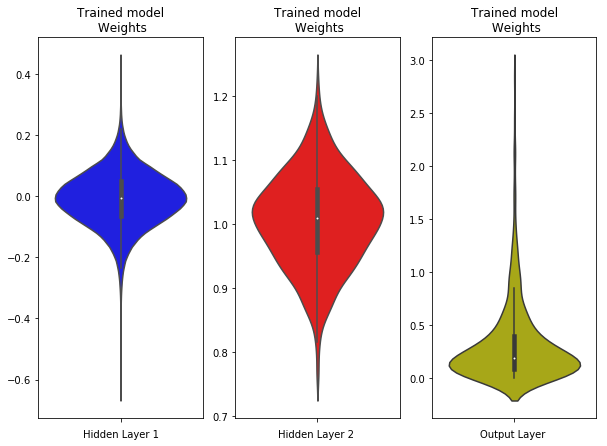

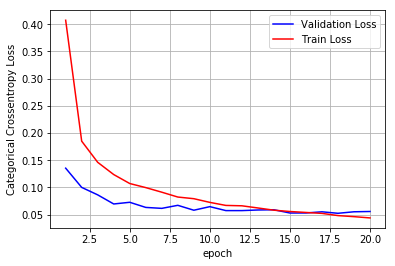

In [170]:
print()
print()
# Plot weight distribution using violin plot
plot_weights(model)

print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

<br/>

#### On 12th epoch we find that validation error and train error comes together, so best value for epoch is 12-13

<br/>
<br/>

#### With 5-Hidden Layers

In [173]:
# Instantiate sequential model
model = Sequential()

# Add 1st hidden layer : dense Layer
dense_layer1 = Dense(624,
                       activation="relu",
                       input_shape=(input_dimension,),
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer1)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 2nd hidden layer : dense Layer
dense_layer2 = Dense(474,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer2)

# Add 3rd hidden layer : dense Layer
dense_layer3 = Dense(324,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer3)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add 4th hidden layer : dense Layer
dense_layer4 = Dense(174,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer4)

# Add 5th hidden layer : dense Layer
dense_layer5 = Dense(24,
                       activation="relu",                   
                       kernel_initializer= he_normal(seed=None))
model.add(dense_layer5)

# Add batch normalization
model.add(BatchNormalization())

# Add dropout
model.add(Dropout(0.5))

# Add output layer : dense Layer
dense_layer4 = Dense(output_dimension, activation='softmax')
model.add(dense_layer4)

# Summary of the model
print("Model Summary: \n")
model.summary()
print()
print()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
trained_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Model Summary: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 624)               489840    
_________________________________________________________________
batch_normalization_8 (Batch (None, 624)               2496      
_________________________________________________________________
dropout_7 (Dropout)          (None, 624)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 474)               296250    
_________________________________________________________________
dense_13 (Dense)             (None, 324)               153900    
_________________________________________________________________
batch_normalization_9 (Batch (None, 324)               1296      
_________________________________________________________________
dropout_8 (Dropout)          (None, 324)               0   

In [174]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy: {0:.2f}%'.format(score[1]*100))

Test score: 0.0593049447054018
Test accuracy: 98.44%


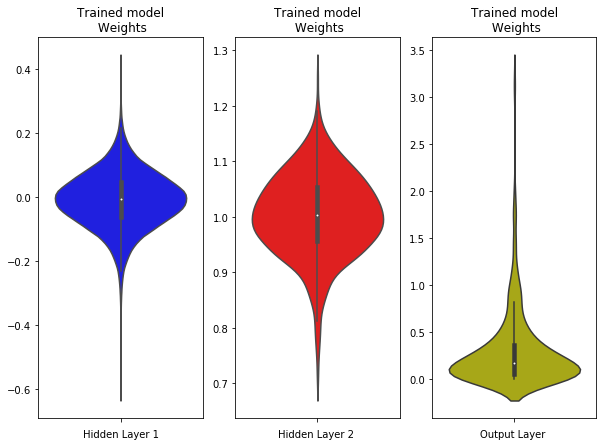

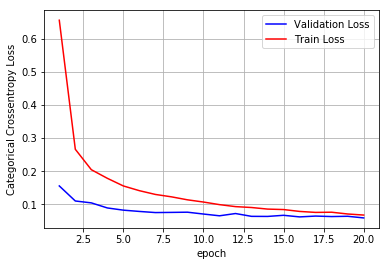

In [175]:
print()
print()
# Plot weight distribution using violin plot
plot_weights(model)

print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, epochs)

<br/>

#### On 19th epoch we find that validation error and train error comes together, so best value for epoch is 19-20

<br/>
<br/>

---
### Observations :
---

> 1. Tried different MLP architectures on MNIST dataset.
> 2. 'Relu' is used as an activation function to develop MLP. 
> 3. 'Adam' is used as an optimizer to develop MLP. 
> 4. Introduced batch normalization and dropout in between hidden layers.
> 5. Got 98.35, 98.45 and 98.44 accuracies for 2,3 and 5 hidden layers.